# Image Segmentation 

We shall explore how edge detection, thresholding and contouring techniques can be used to extract region of interests from an image and get useful inormation from the contours like area, perimeter, etc. The images used have been take from sample data of : https://cellprofiler.org/

In [17]:
!pip install opencv-python

In [1]:
from google.colab import files

uploaded = files.upload()#creating file input stream

for fn in uploaded.keys():#getting the input bytes
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))#get name and length of file

Saving AS_09125_050116030001_D03f00d0.tif to AS_09125_050116030001_D03f00d0.tif
Saving AS_09125_050116030001_D03f00d1.tif to AS_09125_050116030001_D03f00d1.tif
User uploaded file "AS_09125_050116030001_D03f00d0.tif" with length 233336 bytes
User uploaded file "AS_09125_050116030001_D03f00d1.tif" with length 240924 bytes


In [48]:
import numpy as np
import matplotlib.pyplot as plt
 
from skimage import data
from scipy.ndimage import fourier_shift
from skimage import io
from skimage import filters
import glob
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage import filters
import cv2


In [73]:
images = [io.imread(file) for file in glob.glob("/content/*.tif")]


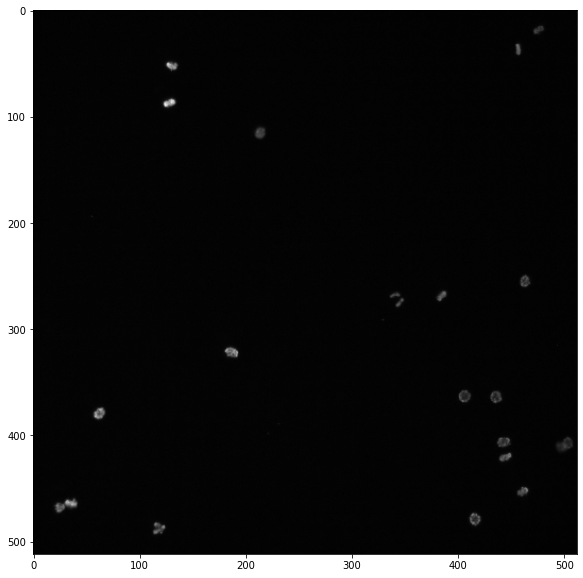

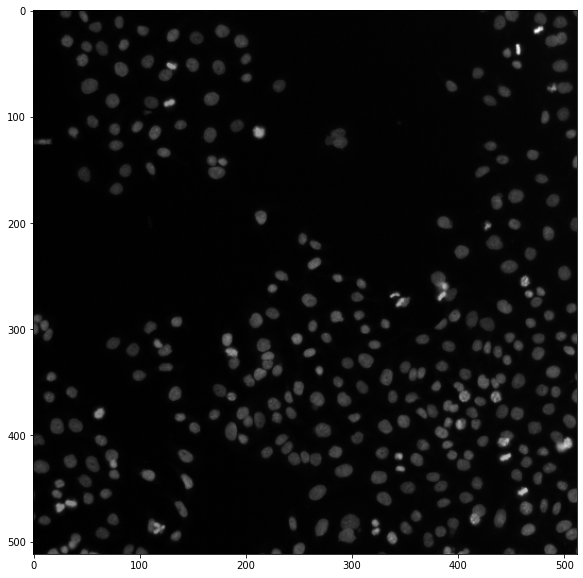

In [50]:
#display the images
for image in images:
  plt.rcParams["figure.figsize"] = [10,10]
  plt.imshow(image,cmap='gray')
  plt.show()

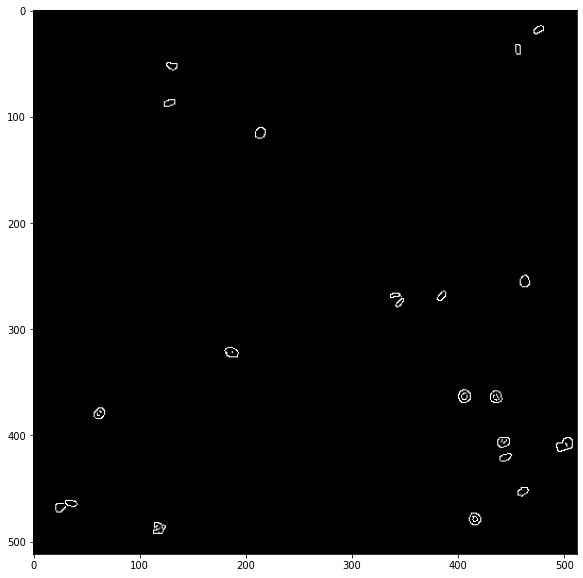

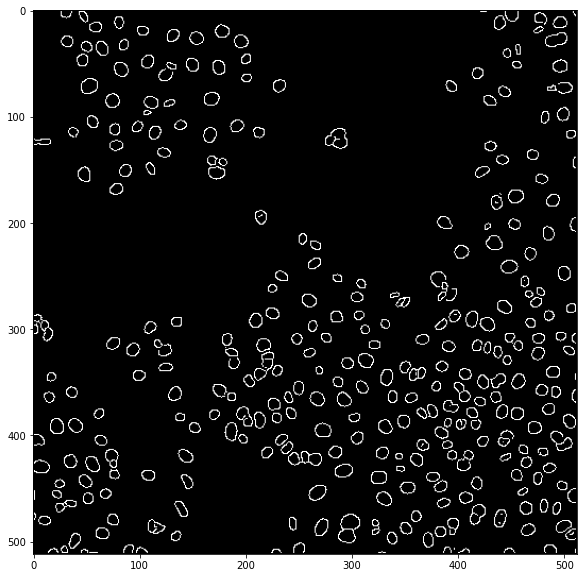

In [51]:
#displayig the edges
for image in images:
  edges = feature.canny(image)
  plt.rcParams["figure.figsize"] = [10,10]
  plt.imshow(edges,cmap='gray')
  plt.show()


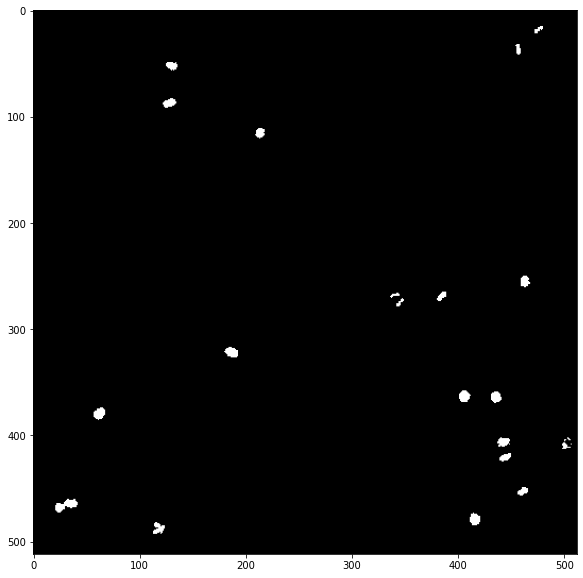

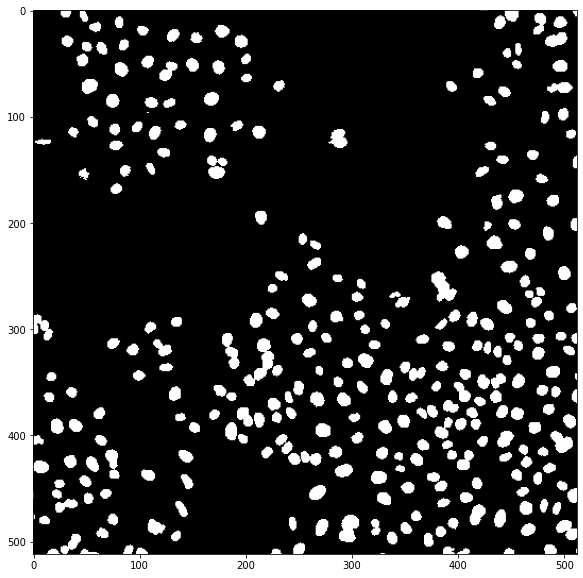

In [52]:
#displayig the threshold images
for image in images:
  thresh = filters.threshold_otsu(image)
  binary = image > thresh
  filled=ndi.binary_fill_holes(binary).astype(int)
  plt.rcParams["figure.figsize"] = [10,10]
  plt.imshow(filled,cmap='gray')
  plt.show()

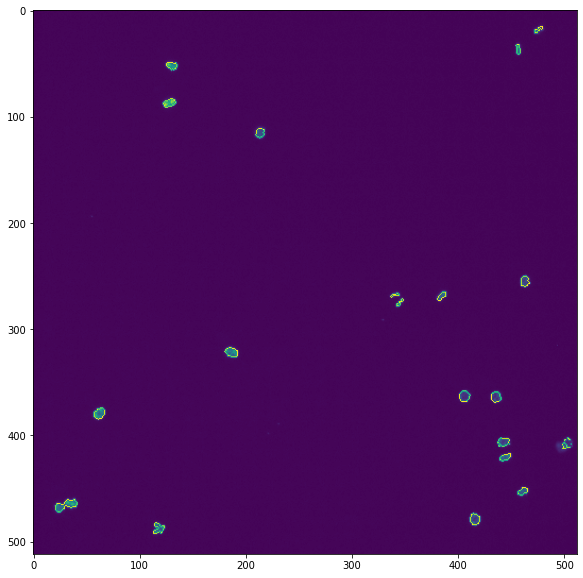

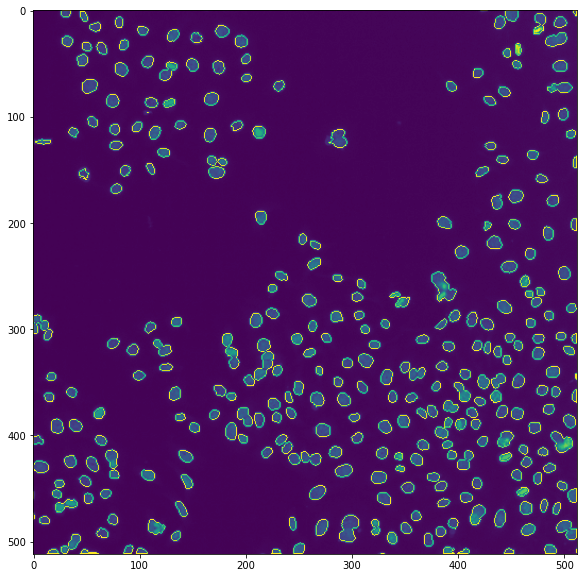

In [53]:
#displaying the contours on original images
for image in images:
  thresh = filters.threshold_otsu(image)
  binary = image > thresh
  filled=ndi.binary_fill_holes(binary).astype(int)
  filled=filled.astype('uint8')
  ret, thresh_image = cv2.threshold(filled, 0, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(image, contours, -1, (255,255,255), thickness = 1)
  plt.rcParams["figure.figsize"] = [10,10]
  plt.imshow(image,cmap='viridis')
  plt.show()

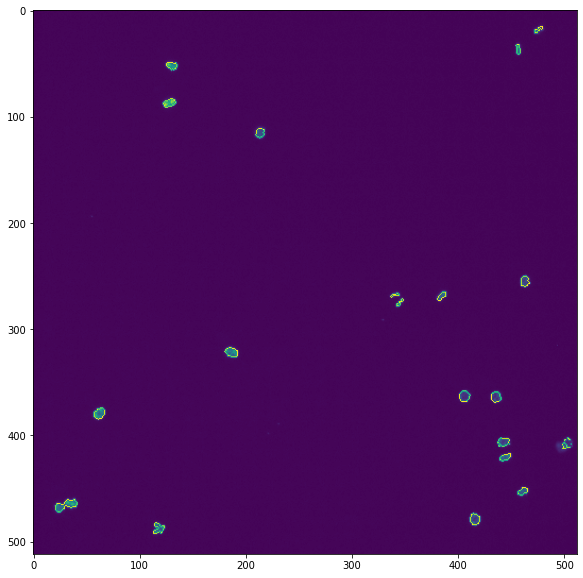

Contour features
********************************************
area:  55.0
perimeter:  44.62741661071777
centrer: 117, 487


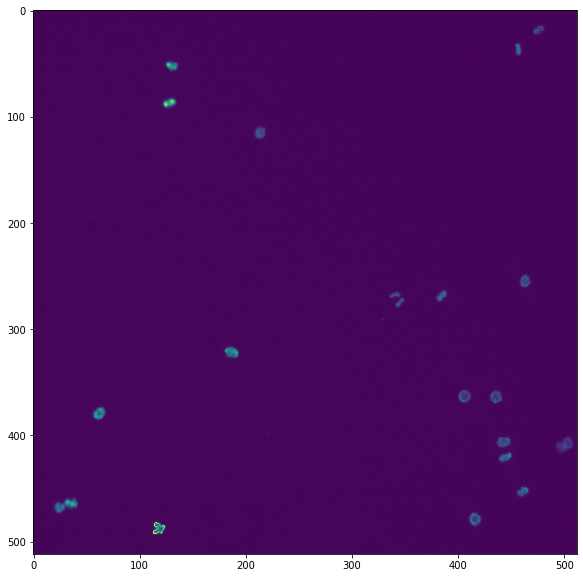

area:  76.5
perimeter:  34.72792184352875
centrer: 415, 478


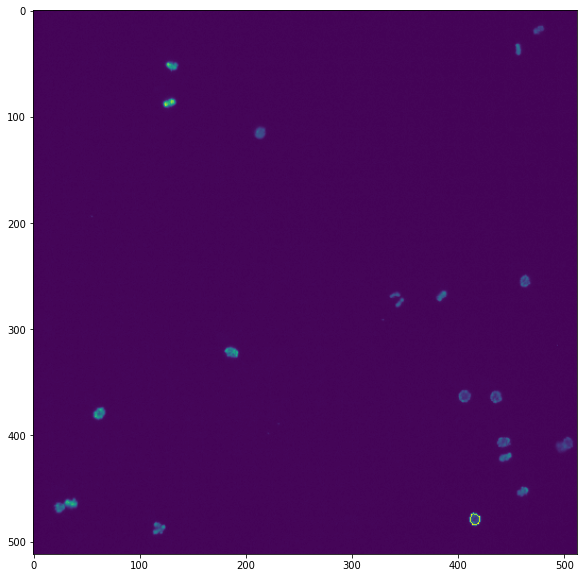

area:  120.0
perimeter:  60.28427076339722
centrer: 30, 465


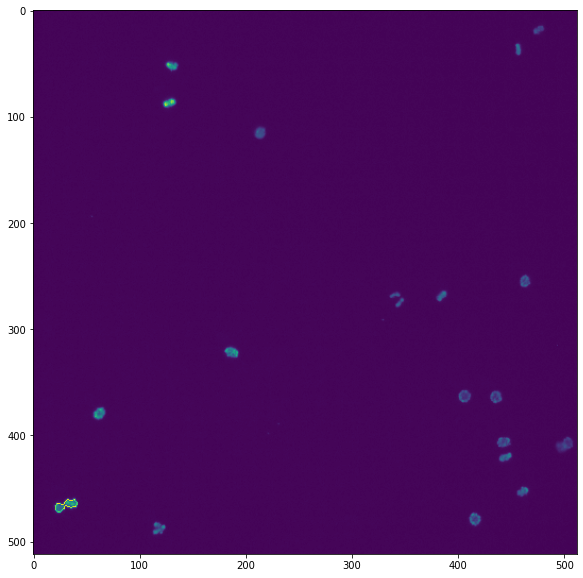

area:  41.0
perimeter:  27.313708305358887
centrer: 460, 452


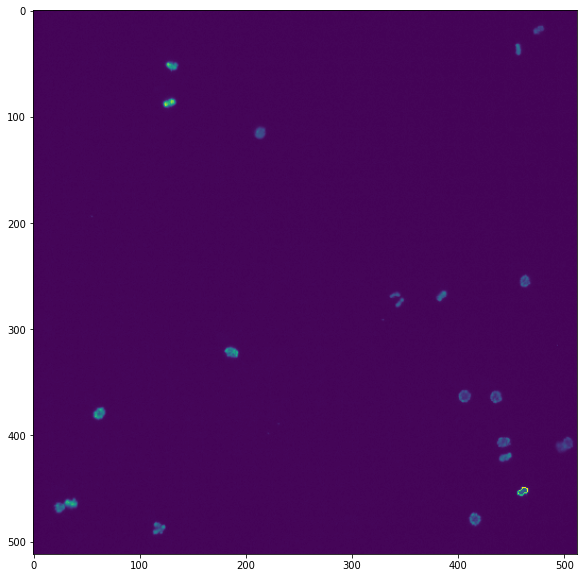

area:  44.5
perimeter:  28.727921843528748
centrer: 444, 420


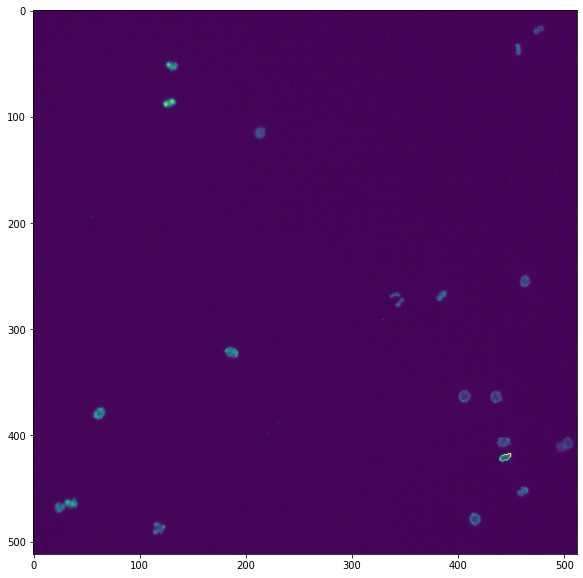

area:  0.0
area:  15.5
perimeter:  21.899494767189026
centrer: 500, 409


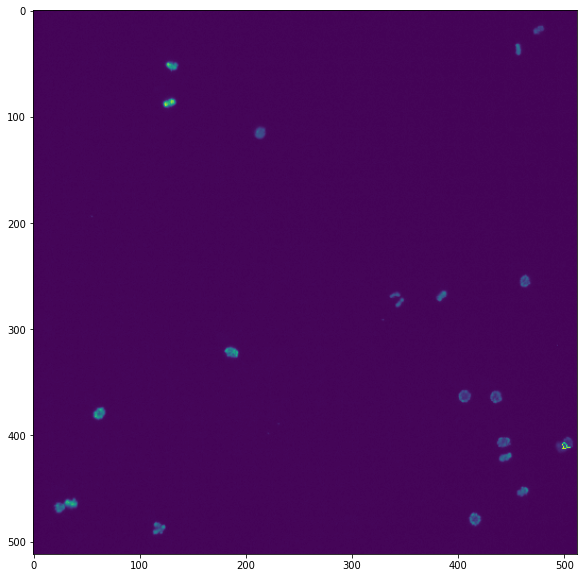

area:  0.5
area:  1.5
area:  59.5
perimeter:  37.21320307254791
centrer: 442, 406


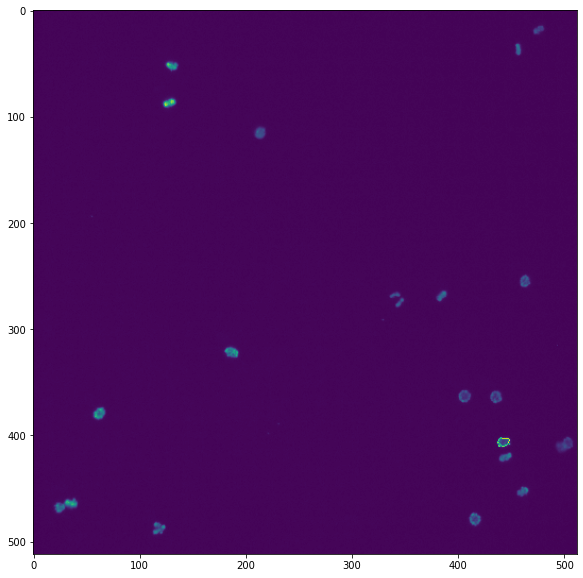

area:  79.0
perimeter:  34.97056245803833
centrer: 62, 379


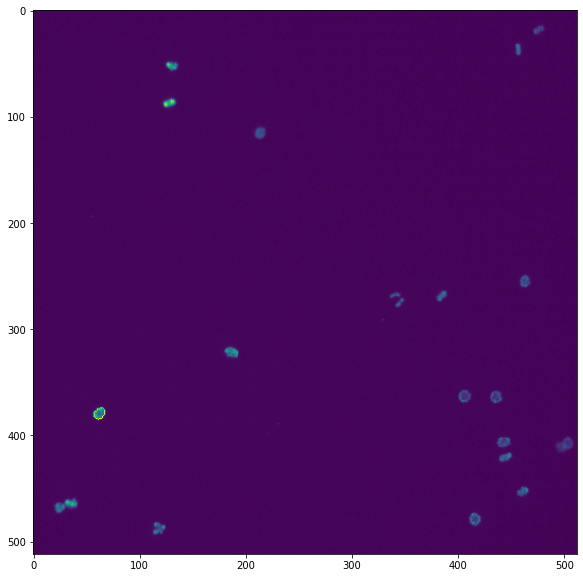

area:  69.5
perimeter:  31.55634891986847
centrer: 435, 363


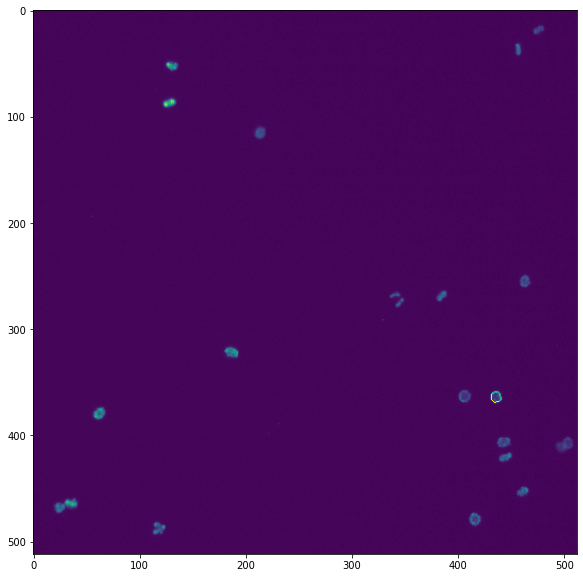

area:  75.0
perimeter:  32.97056245803833
centrer: 405, 363


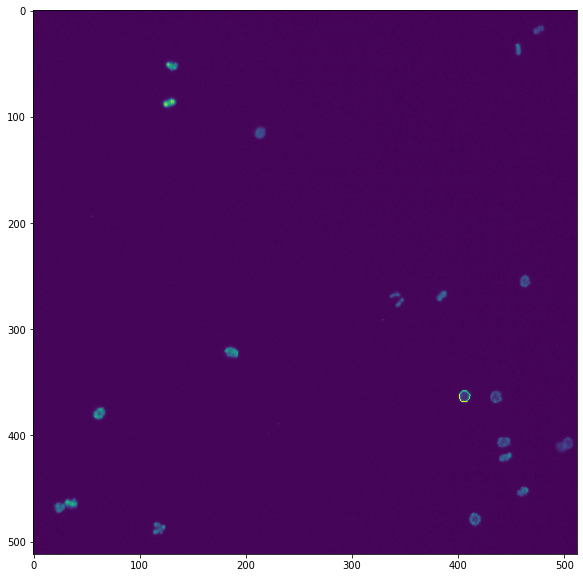

area:  78.5
perimeter:  35.55634891986847
centrer: 186, 321


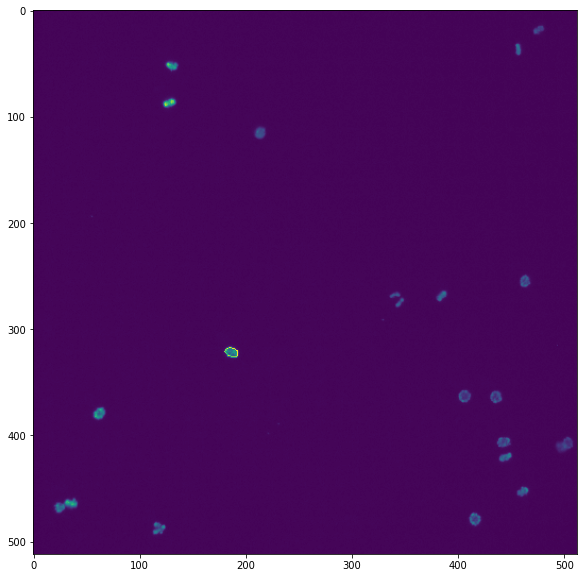

area:  13.5
perimeter:  21.899494767189026
centrer: 344, 274


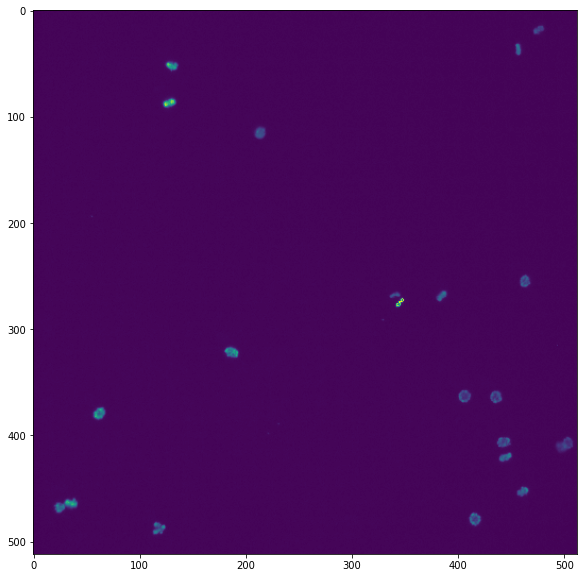

area:  11.5
perimeter:  19.899494767189026
centrer: 340, 267


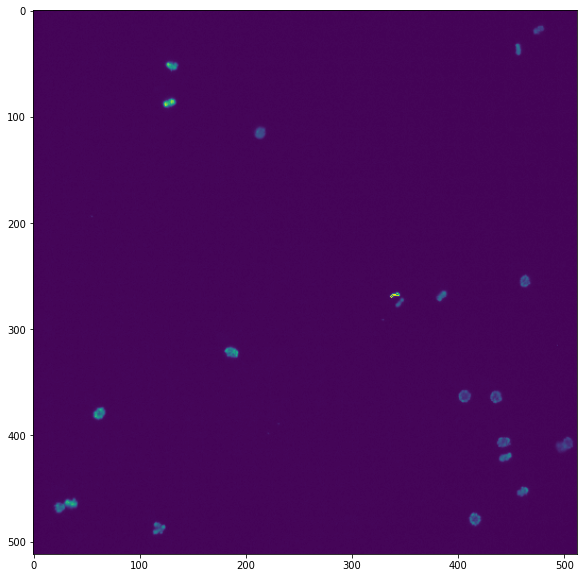

area:  36.5
perimeter:  26.727921843528748
centrer: 384, 268


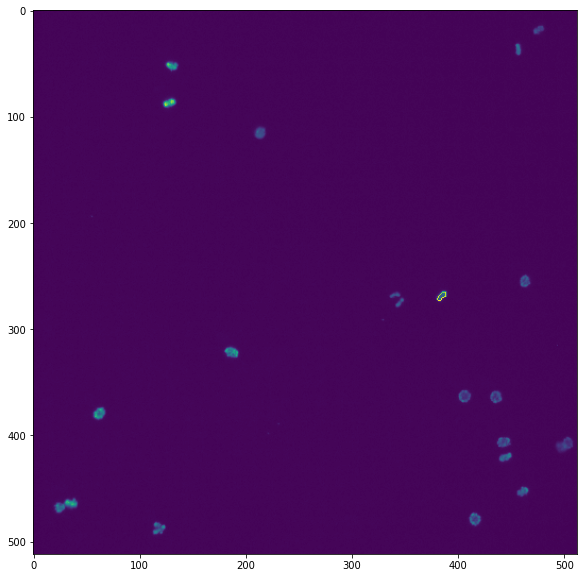

area:  60.0
perimeter:  32.14213538169861
centrer: 462, 254


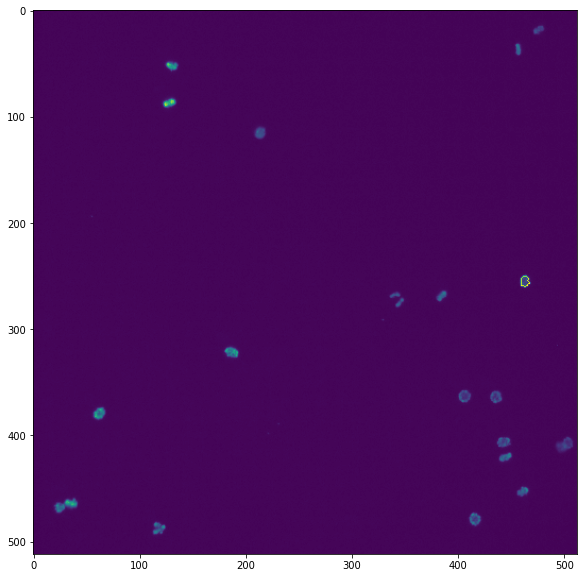

area:  51.0
perimeter:  28.97056245803833
centrer: 213, 115


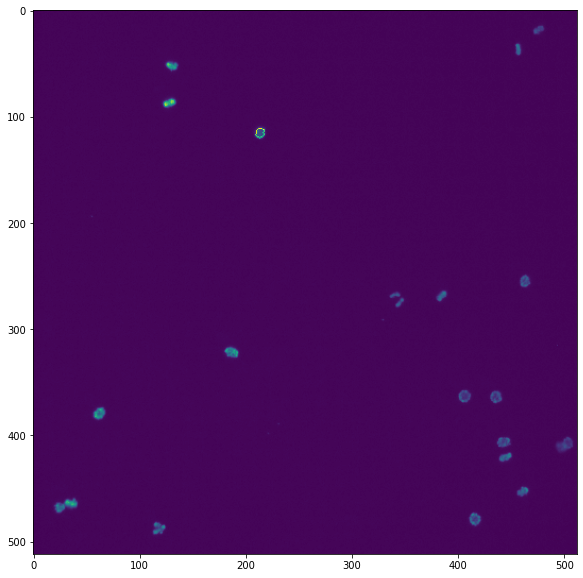

area:  63.0
perimeter:  32.97056245803833
centrer: 127, 87


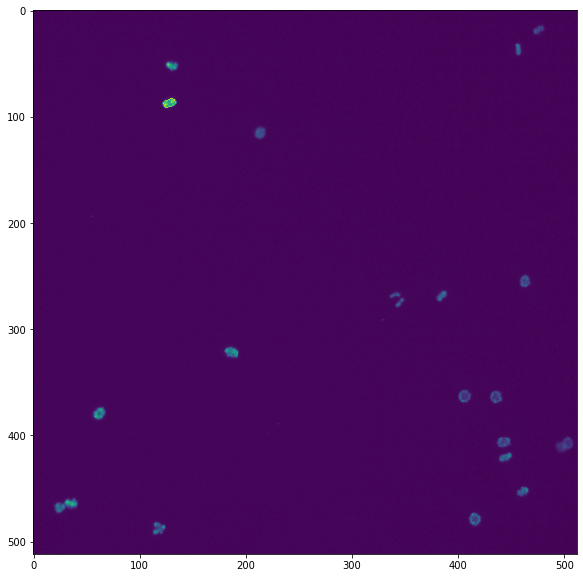

area:  51.0
perimeter:  30.97056245803833
centrer: 130, 52


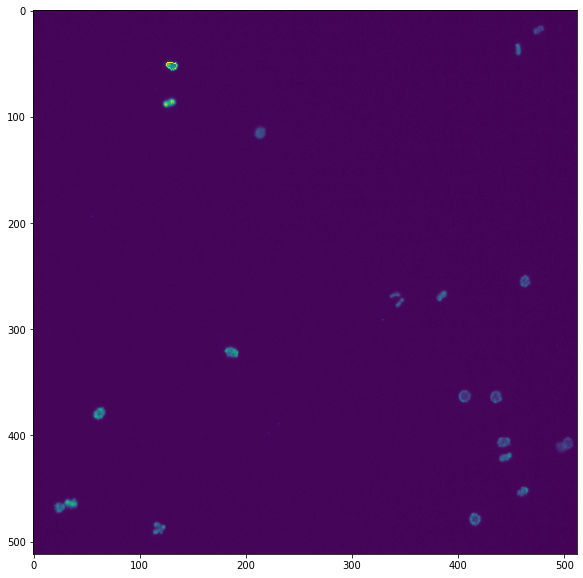

area:  23.5
perimeter:  23.071067690849304
centrer: 456, 36


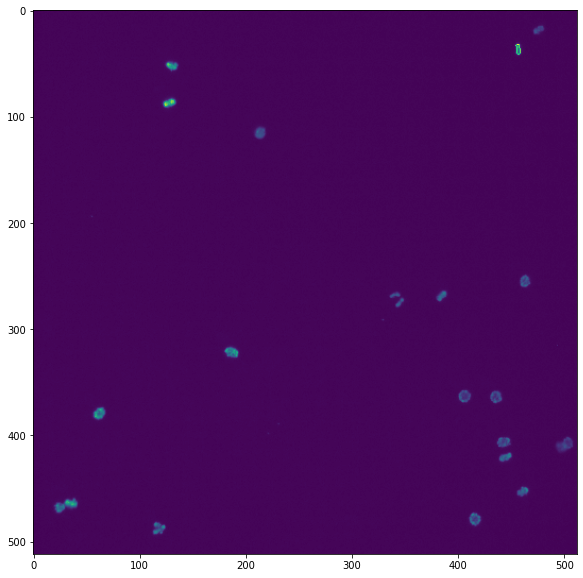

area:  18.0
perimeter:  24.485281229019165
centrer: 475, 17


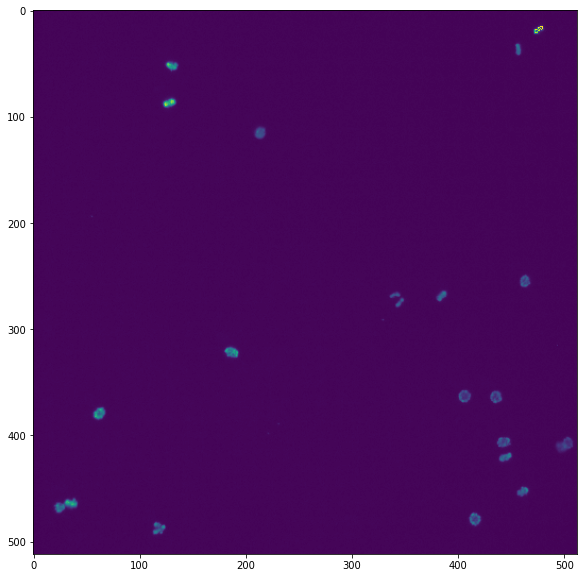

In [78]:
  #extract contour features
  image=images[0]
  thresh = filters.threshold_otsu(image)
  binary = image > thresh
  filled=ndi.binary_fill_holes(binary).astype(int)
  filled=filled.astype('uint8')
  ret, thresh_image = cv2.threshold(filled, 0, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(image, contours, -1, (255,255,255), thickness = 1)
  plt.rcParams["figure.figsize"] = [10,10]
  plt.imshow(image,cmap='viridis')
  plt.show()
  print("Contour features")
  print("********************************************")
  for cnt in contours:
    images = [io.imread(file) for file in glob.glob("/content/*.tif")]
    image=images[0]#re-read and reasign the images to remove previously drawn contours
    area = cv2.contourArea(cnt)
    print("area: ",area)
    if(area>10):
     perimeter =cv2.arcLength(cnt,True)
     print("perimeter: ",perimeter)
     M = cv2.moments(cnt)
     if(M["m00"]!=0):
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
      print("centrer: {}, {}".format(cX,cY))
     cv2.drawContours(image, [cnt],-1, (255,255,255), thickness = 1)
     plt.rcParams["figure.figsize"] = [10,10]
     plt.imshow(image,cmap='viridis')
     plt.show()
     print("=================================================================================")

    
    